### `Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### `Data Import`

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### `Null value Analysis`

In [4]:
(train.isna().sum()/len(train))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
(test.isna().sum()/len(test))*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

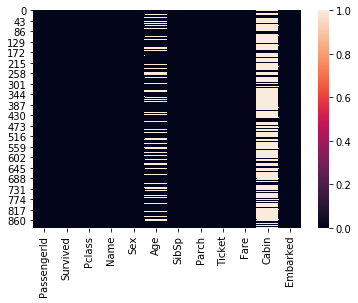

In [6]:
sns.heatmap(train.isna())

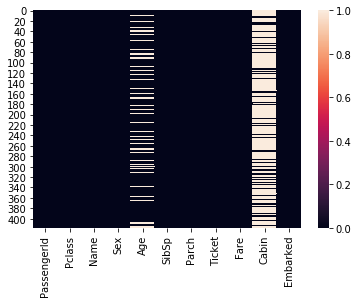

In [7]:
sns.heatmap(test.isna())

#### `Null value Impute :`

In [8]:
train.Age=train.Age.fillna(train.Age.mean())
test.Age=test.Age.fillna(test.Age.mean())
train.Embarked=train.Embarked.fillna('S')
test.Fare=test.Fare.fillna(test.Fare.mean())

## `EDA`

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
def numeric_data(data):
    return data.select_dtypes(include=np.number)
num_data=numeric_data(train)
num_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
def categoric_data(data):
    return data.select_dtypes(include=object)
cat_data=categoric_data(train)
cat_data.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### `Univarent Analysis`

#### `Age`

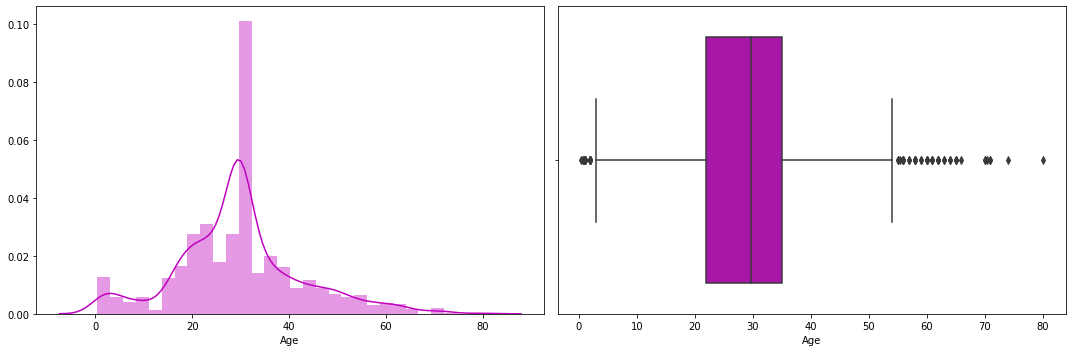

Skew: 0.4344880940129925


In [12]:
# At numeric Data
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train['Age'],color ='m')
plt.subplot(122)            
sns.boxplot(train['Age'],color ='m')
plt.tight_layout()
plt.show() 
print('Skew:',train['Age'].skew())    

#### `Fare`

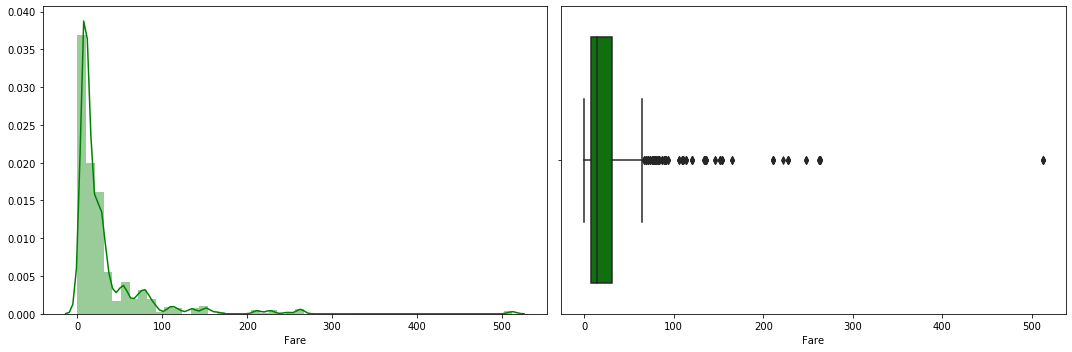

Skew: 4.787316519674893


In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train['Fare'],color ='g')
plt.subplot(122)            
sns.boxplot(train['Fare'],color ='g')
plt.tight_layout()
plt.show() 
print('Skew:',train['Fare'].skew())  

#### Pclass


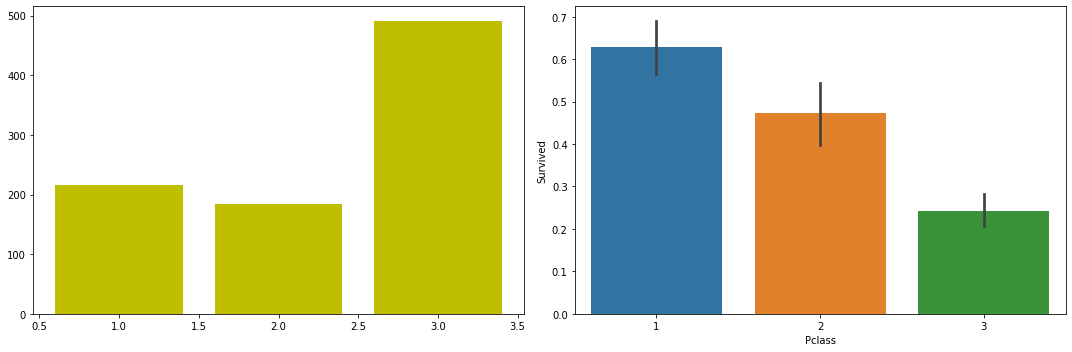

Skew: 4.787316519674893


In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(train['Pclass'].value_counts().index,train['Pclass'].value_counts().values,color ='y')
plt.subplot(122)            
sns.barplot(x='Pclass',y='Survived',data=train)
plt.tight_layout()
plt.show() 
print('Skew:',train['Fare'].skew())  


#### `SEX`

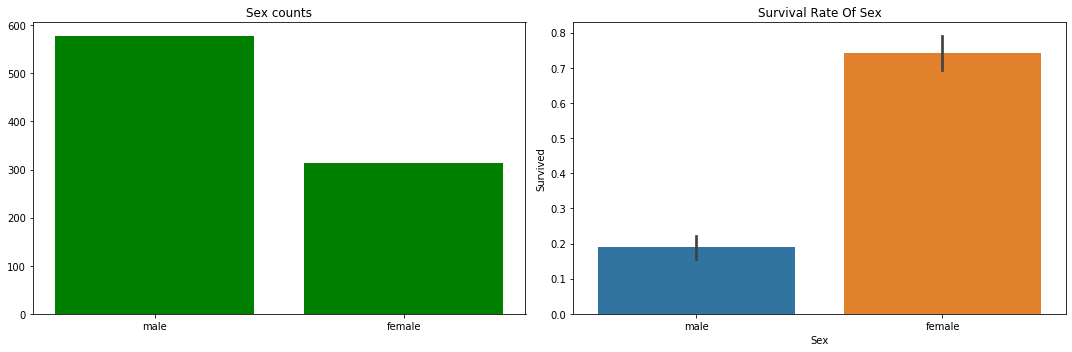

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(train['Sex'].value_counts().index,train['Sex'].value_counts().values,color ='g')
plt.title('Sex counts')
plt.subplot(122)            
sns.barplot(x='Sex',y='Survived',data=train)
plt.title('Survival Rate Of Sex')
plt.tight_layout()
plt.show()

### `Bivarent analysis `

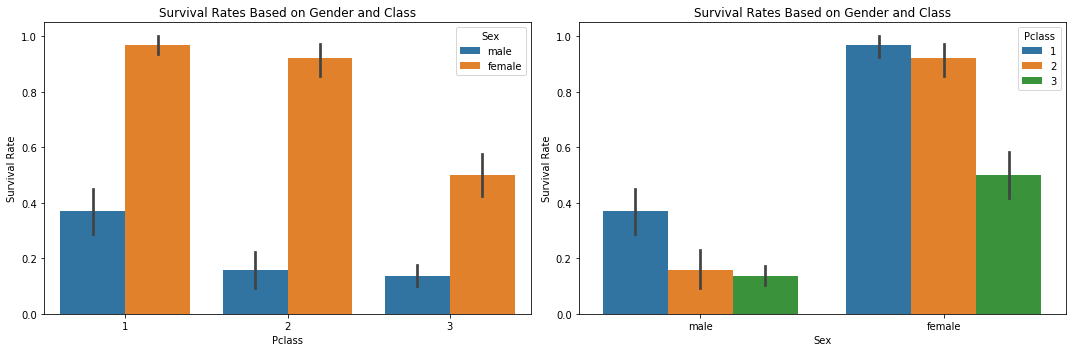

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
plt.subplot(122)
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
plt.tight_layout()
plt.show()

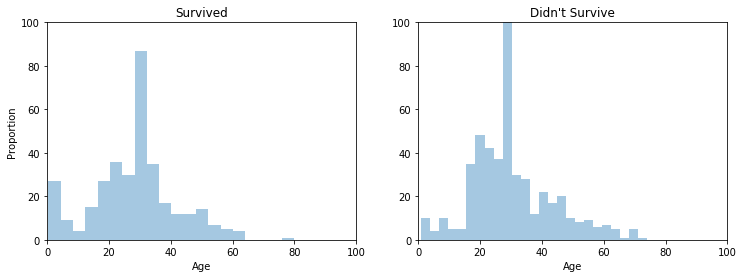

In [17]:
survived_ages = train[train.Survived == 1]["Age"]
not_survived_ages = train[train.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

## ` Pre Preprocessing`

In [12]:
train=train.drop(['Cabin','Name','Ticket'],axis=1)

In [13]:
test=test.drop(['Cabin','Name','Ticket'],axis=1)

In [14]:
train=train.set_index('PassengerId')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [15]:
test=test.set_index('PassengerId')

In [16]:
train['faimly_no']=train['SibSp']+train['Parch']+1
test['faimly_no']=test['SibSp']+test['Parch']+1

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,faimly_no
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2
2,1,1,female,38.0,1,0,71.2833,C,2
3,1,3,female,26.0,0,0,7.9250,S,1
4,1,1,female,35.0,1,0,53.1000,S,2
5,0,3,male,35.0,0,0,8.0500,S,1


In [18]:
train.faimly_no.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: faimly_no, dtype: int64

In [19]:
train['Isalone']=train['faimly_no'].apply(lambda x: 1 if x==1 else 0)
        
    

In [20]:
test['Isalone']=test['faimly_no'].apply(lambda x: 1 if x==1 else 0)

### EDA of Isalone

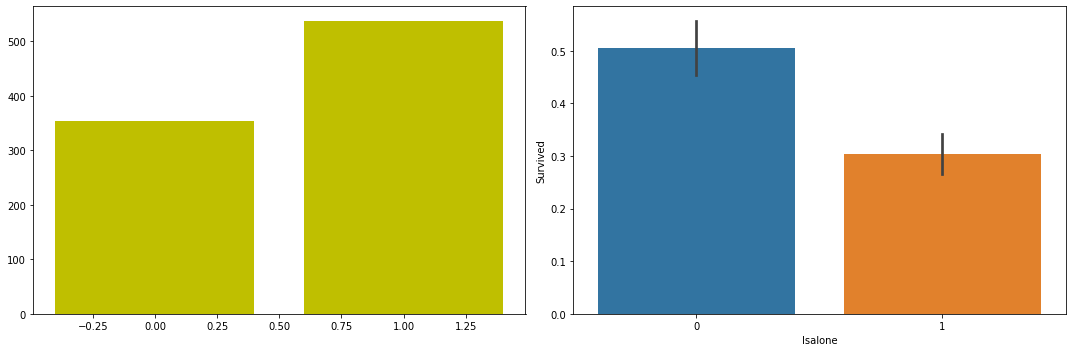

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(train['Isalone'].value_counts().index,train['Isalone'].value_counts().values,color ='y')
plt.subplot(122)            
sns.barplot(x='Isalone',y='Survived',data=train)
plt.tight_layout()
plt.show() 

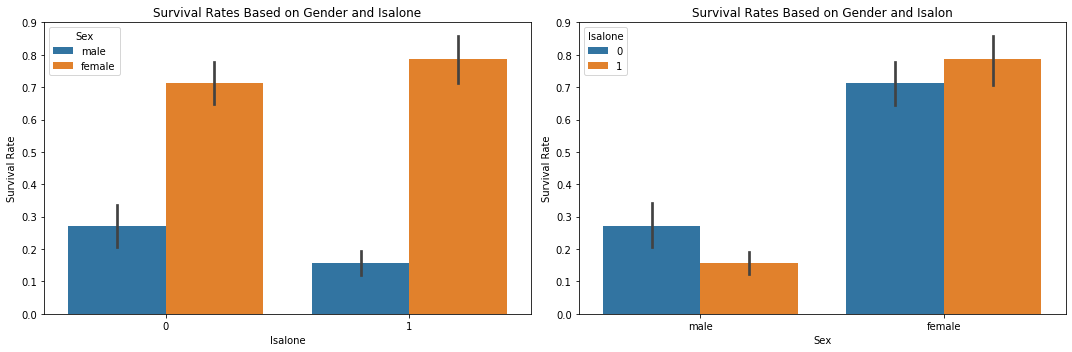

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="Isalone", y="Survived", hue="Sex", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Isalone")
plt.subplot(122)
sns.barplot(x="Sex", y="Survived", hue="Isalone", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Isalon")
plt.tight_layout()
plt.show()

In [23]:
cat_train=['Sex','Embarked']

In [24]:

for i in cat_train:
    lb=LabelEncoder()
    train[i]=lb.fit_transform(train[i])
    test[i]=lb.transform(test[i])


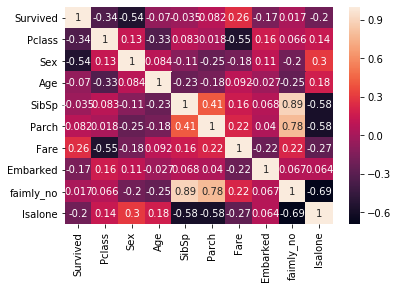

In [25]:
sns.heatmap(train.corr(),annot=True)

In [26]:
skew=test[['Age','SibSp','Parch','Fare','faimly_no']].skew()
skew

Age          0.512711
SibSp        4.168337
Parch        4.654462
Fare         3.691600
faimly_no    3.168542
dtype: float64

In [27]:
for col in skew.index:
    if abs(skew.loc[col])>1:
        train[col]=np.sqrt(train[col])
        test[col]=np.sqrt(test[col])

In [28]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


train[['Age','SibSp','Parch','Fare','faimly_no']] = treat_outliers(train[['Age','SibSp','Parch','Fare','faimly_no']])


In [29]:
test[['Age','SibSp','Parch','Fare','faimly_no']] = treat_outliers(test[['Age','SibSp','Parch','Fare','faimly_no']])

### `Clustering`

[[2.94605809e-01 2.79668050e+00 6.92946058e-01 2.96596607e+01
  2.11618257e-01 1.09185512e-01 3.28945906e+00 1.45643154e+00
  1.14418915e+00 7.59336100e-01]
 [5.79710145e-01 2.63768116e+00 5.36231884e-01 7.00000000e+00
  7.53623188e-01 1.14261769e+00 5.19839844e+00 1.62318841e+00
  1.82227049e+00 2.89855072e-02]
 [3.30882353e-01 2.47058824e+00 6.47058824e-01 2.33272059e+01
  2.57352941e-01 2.08711591e-01 4.19021982e+00 1.61764706e+00
  1.20906769e+00 6.76470588e-01]
 [3.44262295e-01 2.24590164e+00 6.39344262e-01 4.05081967e+01
  3.11475410e-01 3.56195444e-01 4.64209704e+00 1.68852459e+00
  1.28908552e+00 5.90163934e-01]
 [4.86842105e-01 1.89473684e+00 6.44736842e-01 3.52434211e+01
  3.81578947e-01 2.61835460e-01 5.24702157e+00 1.65789474e+00
  1.27656570e+00 5.26315789e-01]
 [5.26315789e-01 1.43421053e+00 6.57894737e-01 2.95298104e+01
  3.28947368e-01 2.25554416e-01 7.30104930e+00 1.35526316e+00
  1.23644518e+00 6.18421053e-01]
 [3.77049180e-01 1.61475410e+00 6.72131148e-01 4.65737705e

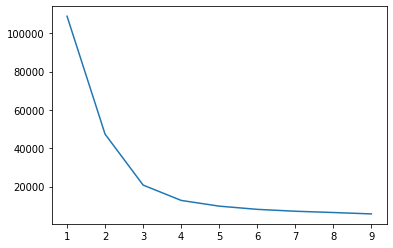

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8,init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(train)
centroids=km.cluster_centers_
wcss=km.inertia_
print(centroids,wcss)
dist=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(train)
    dist.append(km.inertia_)
plt.plot(range(1,10),dist)


In [57]:
km = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
train['cluster']=km.fit_predict(train)
test['cluster']=km.fit_predict(test)



In [58]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,faimly_no,Isalone,cluster
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1.0,0.0,2.692582,2,1.414214,0,1
2,1,1,0,38.0,1.0,0.0,8.442944,0,1.414214,0,0
3,1,3,0,26.0,0.0,0.0,2.815138,2,1.000000,1,2
4,1,1,0,35.0,1.0,0.0,7.286975,2,1.414214,0,2
5,0,3,1,35.0,0.0,0.0,2.837252,2,1.000000,1,2


In [59]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,faimly_no,Isalone,cluster
PassengerId,,,,,,,,,,
892,3,1,34.5,0.0,0.0,2.798071,1,1.000000,1,0
893,3,0,47.0,1.0,0.0,2.688717,2,1.414214,0,1
894,2,1,48.0,0.0,0.0,3.112475,1,1.000000,1,1
895,3,1,27.0,0.0,0.0,2.943213,2,1.000000,1,0
896,3,0,22.0,1.0,1.0,3.505353,2,1.732051,0,2


## `Modeling`

In [60]:
y=train.iloc[:,0]
X=train.iloc[:,1:]


In [61]:
train_x,val_x,train_y,val_y=train_test_split(X,y,test_size=0.2,random_state=5)

In [62]:
#train_xx,test_xx,train_yy,test_yy=train_test_split(train_x,train_y,test_size=0.2,random_state=5)

#### `Logestic_Regression`

In [63]:
log=LogisticRegression()
log.fit(train_x,train_y)
y_p=log.predict(val_x)
print('Confussion matrix:',confusion_matrix(val_y,y_p))
print('score:',log.score(val_x,val_y))

Confussion matrix: [[96 15]
 [19 49]]
score: 0.8100558659217877


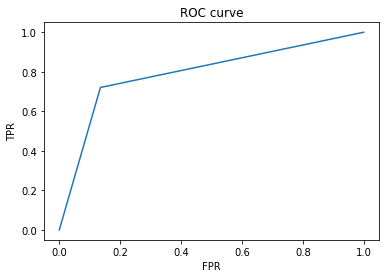

In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y,y_p)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [65]:
print(classification_report(val_y,y_p))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       111
           1       0.77      0.72      0.74        68

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



### `Random Forest`

In [66]:
Rf=RandomForestClassifier( random_state=5)
Rf.fit(train_x,train_y)
y_pr=Rf.predict(val_x)
print('Confussion matrix:',confusion_matrix(val_y,y_pr))
print('score:',log.score(val_x,val_y))


Confussion matrix: [[99 12]
 [18 50]]
score: 0.8100558659217877


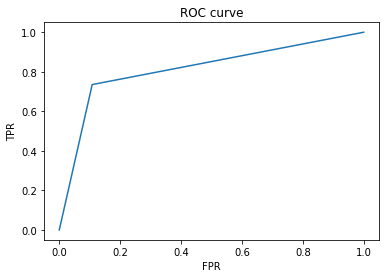

In [67]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y,y_pr)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### `XGBOOST`

In [68]:
xg=XGBClassifier()
xg.fit(train_x,train_y)
y_px=xg.predict(val_x)
print('Confussion matrix:',confusion_matrix(val_y,y_px))
print('score:',log.score(val_x,val_y))

Confussion matrix: [[105   6]
 [ 22  46]]
score: 0.8100558659217877


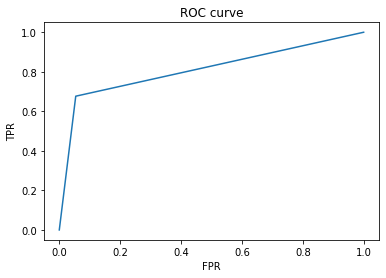

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y,y_px)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### `Hyperparameter Tunning`

#### Random Forest

In [76]:
param_grid = { 
'n_estimators': [100,500,1000,1500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [2,3,4,5],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(Rf, param_grid=param_grid)
grid_search_model.fit(train_x, train_y)
print(grid_search_model.score(val_x,val_y))

grid_search_model.best_params_

0.8435754189944135


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 1500}

In [77]:
new_rf=RandomForestClassifier( n_estimators=1500,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=5,
    verbose=0,
    warm_start=False,
    class_weight=None)

In [78]:
new_rf.fit(train_x,train_y)
y_rn=new_rf.predict(val_x)
new_rf.score(val_x,val_y)

0.8435754189944135

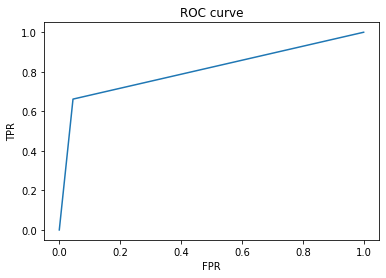

In [79]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y,y_rn)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### `XGBOOST`

In [47]:
param_grid = { 
'n_estimators': [50,100,1000],
'max_depth' : [2,3,4,5,8],
'learning_rate':[0.2,0.1,0.01,0.5]
}
grid_search_model = GridSearchCV(xg, param_grid=param_grid)
grid_search_model.fit(train_x, train_y)
grid_search_model.score(val_x,val_y)

grid_search_model.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}

In [72]:
xg_new=XGBClassifier(    max_depth=2,
    learning_rate=0.2,
    n_estimators=100,
    verbosity=2,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=5,
    seed=None,
    missing=None)

In [73]:
xg_new.fit(train_x,train_y)
y_rx=xg_new.predict(val_x)
xg_new.score(val_x,val_y)

[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12]

[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:38:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


0.8491620111731844

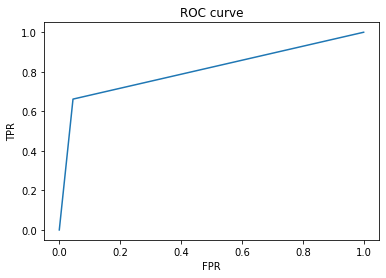

In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y,y_rn)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### `Final Submission`

In [83]:

X=train.iloc[:,1:]
Y=train.iloc[:,0]


In [88]:
new_rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [89]:
predict=new_rf.predict(test)

In [90]:
submission=pd.DataFrame(predict,index=test.index,columns=['Survived'])

In [91]:
submission.to_csv('final1.csv')